In [2]:
%cd ..

d:\HUST\20232\ML\Project_OCR\HandwritingRecognition


In [3]:
import os
import zipfile
import shutil

import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image

from tools import utils

c:\Users\tandat17z\anaconda3\envs\env_tandat17z\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Check số lượng file

In [6]:
root = 'data/raw/data_v3'
len(os.listdir(root + '/img')), len(os.listdir(root + '/label'))

(667, 667)

# Split data

In [46]:
os.makedirs('data/train/img')
os.makedirs('data/train/label')

os.makedirs('data/test/img')
os.makedirs('data/test/label')

In [67]:
root = 'data/raw/data_v3'

In [68]:
cnt = 0
char_count = []
list_str = {}
for path in os.listdir(root + '/img'):
    ext = ('png', 'PNG', 'JPG', 'jpg', 'JPEG', 'jpeg')
    if path.endswith(ext):
        imgpath = root + '/img/' + path
        labelpath = root + '/label/' +  os.path.splitext(path)[0] + '.txt'
        
        # Đọc text
        with open(labelpath, 'r') as f:
            content = f.readline().rstrip('\n').strip()
        
        char_count.append(len(content))
        if len(content) in list_str.keys():
            list_str[len(content)].append(path)
        else:
            list_str[len(content)] = [path]

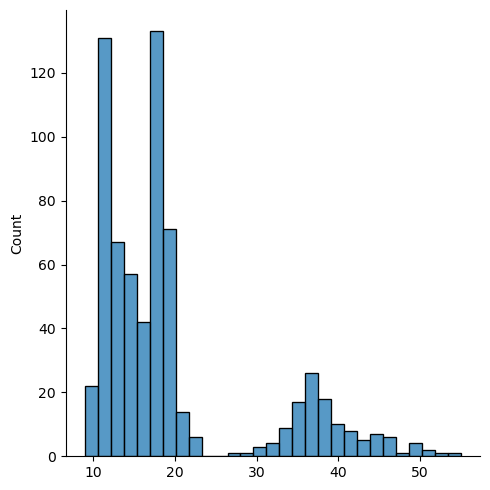

In [69]:
sns.displot(char_count)

In [70]:
from sklearn.model_selection import train_test_split

print(root)
train_data = []
test_data = []
train_data, test_data = train_test_split(os.listdir(root + '/img'), test_size = 0.2, random_state=42)

data/raw/data_v3


In [71]:
len(train_data), len(test_data)

(533, 134)

In [72]:
path_train = 'data/train'
for path in train_data:
    if path not in os.listdir(path_train + '/img'):
        imgpath = root + '/img/' + path
        labelpath = root + '/label/' + os.path.splitext(path)[0] + '.txt'

        shutil.copy(imgpath, path_train + '/img') # Di chuyển file 
        shutil.copy(labelpath, path_train + '/label') # Di chuyển file 

In [73]:
path_test = 'data/test'
for path in test_data:
    if path not in os.listdir(path_test + '/img'):
        imgpath = root + '/img/' + path
        labelpath = root + '/label/' + os.path.splitext(path)[0] + '.txt'

        shutil.copy(imgpath, path_test + '/img') # Di chuyển file 
        shutil.copy(labelpath, path_test + '/label') # Di chuyển file 

In [74]:
for path in os.listdir('data/train/img'):
    if os.path.splitext(path)[0] + '.txt' not in os.listdir('data/train/label'):
        print(path)

In [4]:
len(os.listdir('data/train/img')), len(os.listdir('data/train/label'))

(1600, 1600)

In [5]:
len(os.listdir('data/test/img')), len(os.listdir('data/test/label'))

(399, 399)

# Lấy tất cả các ký tự

In [101]:
list_char = set()

In [102]:
len(os.listdir('data/train/img'))

1601

In [106]:
for path in os.listdir('data/test/img'):
    with open('data/test/label/' + os.path.splitext(path)[0] + '.txt', 'r') as f:
        content = f.readline().rstrip('\n').strip()
        if '#' in content: print(path)
    list_char.update(content)

In [107]:
l = list(list_char)
l.sort()
char_v3 = ''.join(l)
print(char_v3)
char_v3

 !"&(),-./0123456789:?ABCDEFGHIJKLMNOPQRSTUVXYabcdeghiklmnopqrstuvwxyzÀÁÂÔàáâãèéêìíòóôõùúýăĐđĩũơưạẢảẤấầẩẫậắằẳẵặẹẻẽếỀềỂểễỆệỉịọỏốồỔổỗộớờởỡợụỦủỨứừửữựỳỵỷỹ


' !"&(),-./0123456789:?ABCDEFGHIJKLMNOPQRSTUVXYabcdeghiklmnopqrstuvwxyzÀÁÂÔàáâãèéêìíòóôõùúýăĐđĩũơưạẢảẤấầẩẫậắằẳẵặẹẻẽếỀềỂểễỆệỉịọỏốồỔổỗộớờởỡợụỦủỨứừửữựỳỵỷỹ'

In [108]:
len(char_v3)

150

In [109]:
len(' !"&(),-./0123456789:?ABCDEFGHIJKLMNOPQRSTUVXYabcdeghiklmnopqrstuvwxyzÀÁÂÔàáâãèéêìíòóôõùúýăĐđĩũơưạẢảẤấầẩẫậắằẳẵặẹẻẽếỀềỂểễỆệỉịọỏốồỔổỗộớờởỡợụỦủỨứừửữựỳỵỷỹ')

150

# Khảo sát

In [9]:
root = 'data/train'
count_char = []
for path in os.listdir(root + '/img/'):
    imgpath = root +  '/img/' + path
    labelpath = root + '/label/' +  os.path.splitext(path)[0] + '.txt'

    with open(labelpath, 'r') as f:
        content = f.readline().rstrip('\n').strip()
        count_char.append(len(content))


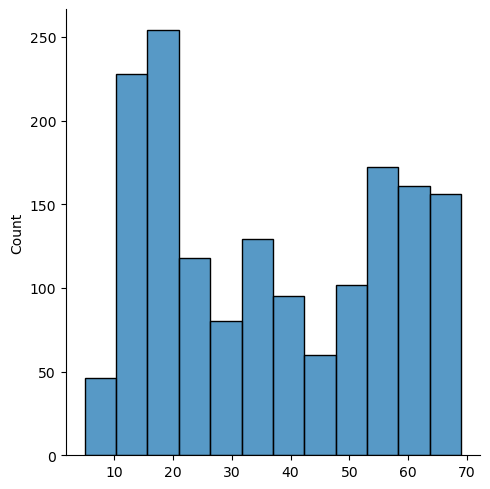

In [10]:
sns.displot(count_char)